<a href="https://colab.research.google.com/github/VisarBuza/data-processing-and-visualization2021-22/blob/main/phase2-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this notebook we preprocess a data set of Amazon Prime Movies and TV shows.

The dataset can be found [here](https://www.kaggle.com/shivamb/amazon-prime-movies-and-tv-shows).

In [315]:
import pandas as pd 
import collections
import numpy as np
import plotly.express as px
from collections import Counter
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
df = pd.read_csv("/amazon_prime_titles.csv")

## Dataset exploration and modification

### Data types
The data set has 12 columns.

**type** and **rating** are categorical data types.

**release_year** is a numerical data type.

**show_id**, and **rating** are alphanumerical data types

In [316]:
len(df.columns)

12

In [317]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [319]:
df.nunique()

show_id         9668
type               2
title           9668
director        5774
cast            7927
country           86
date_added        84
release_year     100
rating            24
duration         219
listed_in        518
description     9414
dtype: int64

## Data quality
After looking through the data we can find several issues with it.

First we can see that the date_added, and country colums are provided only for 155 and 672 records respectively. We can go ahead and drop these columns since they provide no additional value.

The director and cast values are missing for some of the records.

In [320]:
df.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,9668,9668,9668,7586,8435,672,155,9668.000000,9331,9668,9668,9668
unique,9668,2,9668,5774,7927,86,84,NaN,24,219,518,9414
top,s2002,Movie,Entanglement,Mark Knight,Maggie Binkley,United States,"March 30, 2021",NaN,13+,1 Season,Drama,"Arpo was designed as a commando robot, built a..."
freq,1,7814,1,113,56,253,14,NaN,2117,1342,986,15
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.341849,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.922482,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1920.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


We can also check if the data set has duplicate rows.

This dataset has no duplicate rows.

In [321]:
duplicate = df[df.duplicated()]
duplicate.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [322]:
df.loc[df['director'] == '1']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6930,s6931,Movie,Title Post onboarding 8,1,1,NaN,NaN,2021,18+,61 min,Action,Title Post onboarding 8
7127,s7128,Movie,Act 4 - Title before 1C onboarding 2,1,1,NaN,NaN,2021,ALL,61 min,Action,1
7128,s7129,Movie,Act 4 - Title before 1C onboarding 1,1,1,NaN,NaN,2021,ALL,61 min,Action,1
7139,s7140,Movie,Clip: 1,1,1,NaN,NaN,2021,18+,3 min,Action,clip1
7238,s7239,Movie,Clip: ACT 4 - Title after removing 1C - 5,1,1,NaN,NaN,2021,ALL,61 min,Action,ACT 4 - Title after removing 1C - 5
7239,s7240,Movie,Clip: ACT 4 - Title after removing 1C - 2,1,1,NaN,NaN,2021,ALL,61 min,Action,ACT 4 - Title after removing 1C - 2 a
7245,s7246,Movie,ACT 4 - Title after removing 1C - 1,1,1,NaN,NaN,2021,ALL,61 min,Action,ACT 4 - Title after removing 1C -
7258,s7259,Movie,Clip: ACT 4 - Title after removing 1C - 4,1,1,NaN,NaN,2021,7+,61 min,Comedy,ACT 4 - Title after removing 1C - 44
8501,s8502,Movie,Act 6 - Title 1,1,1,NaN,NaN,2021,ALL,61 min,Action,Act 6 - Title 1
8502,s8503,Movie,Act 5 - Title 1,1,1,NaN,NaN,2021,ALL,61 min,Action,Act 5 - Title 1


Some of the values for director have values of 1, so we can go ahead and drop those records since they bring no value.

In [323]:
df = df[df.director != '1']

In [324]:
df.loc[df['rating'] == 'AGES_18_']


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5132,s5133,Movie,100 Streets,Jim O'Hanlon,"Idris Elba, Gemma Arterton, Charlie Creed-Mile...",NaN,NaN,2017,AGES_18_,94 min,"Action, Drama, Suspense","100 Streets is a powerful ensemble drama, foll..."
5150,s5151,Movie,M.F.A.,Natalia Leite,"Francesca Eastwood, Clifton Collins Jr., Leah ...",NaN,NaN,2017,AGES_18_,92 min,"Drama, Horror, Suspense",Francesca Eastwood gives a breakout performanc...
5734,s5735,Movie,Plug Love,Derek Scott,"Murda Pain, Jessica Ryan, Sino Harris, Lance W...",NaN,NaN,2017,AGES_18_,115 min,"Drama, Romance",Ucult Studios presents a woman realizes that b...


Some of the values for rating can be normalized as follows:

NOT_RATE and NR can be mapped to UNRATED

ALL_AGES can be mapped to ALL

AGES_16_ can be mapped to 16+

AGES_18_ can be mapped to 18+

In [325]:
df['rating'] = df['rating'].fillna('ALL')
df['rating'] = df.apply(lambda x : 'UNRATED' if "NOT_RATE" in x['rating'] else x['rating'], axis = 1)
df['rating'] = df.apply(lambda x : 'UNRATED' if "NR" in x['rating'] else x['rating'], axis = 1)
df['rating'] = df.apply(lambda x : 'ALL' if "ALL_AGES" in x['rating'] else x['rating'], axis = 1)
df['rating'] = df.apply(lambda x : '16+' if "AGES_16_" in x['rating'] else x['rating'], axis = 1)
df['rating'] = df.apply(lambda x : '18+' if "AGES_18_" in x['rating'] else x['rating'], axis = 1)

## Missing values

There are a lot of missing values, especially the country and date_added columns, we can safely remove them.

In [326]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2082
cast            1233
country         8980
date_added      9497
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [327]:
df.drop(columns=['date_added', 'country'], inplace = True)

For the rating column, we can estimate that they are applicable to all ages and will mark them as **ALL**

In [328]:
df['rating'] = df['rating'].fillna('ALL')

In [329]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2082
cast            1233
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [330]:
df.describe(include="all")

,show_id,type,title,director,cast,release_year,rating,duration,listed_in,description
count,9652,9652,9652,7570,8419,9652.000000,9652,9652,9652,9652
unique,9652,2,9652,5773,7927,NaN,18,219,518,9405
top,s2002,Movie,Entanglement,Mark Knight,Maggie Binkley,NaN,13+,1 Season,Drama,"Arpo was designed as a commando robot, built a..."
freq,1,7798,1,113,56,NaN,2117,1342,986,15
mean,NaN,NaN,NaN,NaN,NaN,2008.320866,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,18.931135,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1920.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2007.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


## Dimensionality reduction

We have columns that are not needed for further processing of the data, so we can go ahead and remove them.


In [331]:
df.drop(columns=['description','show_id'], inplace = True)

## Transformation

The duration column has the values as string, and it differs based on type of the record.
If the record is a movie, the column of duration accounts for the minutes of the duration.
If the record is a tv show, the column of duration accounts for the number of seasons that the show has.

**TV Show**: 1 Season

**Movie** : 113 min

We can normalize the duration field for movies by removing the min part of the string.
For tv shows we can add a new feature labeled season_count which is the normalized value of how many seasons that tv show has.

In [332]:
df['season_count'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)

## Feature creation

All of the movies or tv shows presented here fall under some genre in the **listed_in** column. These are delimited with **' , '**. New columns can be created to represent a primary genre, secondary genre and so forth.

In [333]:
df[['genre 1', 'genre 2', 'genre 3', 'genre 4', 'genre 5']] = df['listed_in'].str.split(',', expand=True)
df.drop(columns=['listed_in'], inplace=True)

## Binarization

In the dataset we are using, there are only two columns for type, so we can change the name to IsMovie and binarize the values

In [334]:
df.loc[df['type'] == 'Movie', 'type'] = 1
df.loc[df['type'] == 'TV Show', 'type'] = 0
df.rename(columns={'type': 'is_movie'}, inplace = True)
df.head()

,is_movie,title,director,cast,release_year,rating,duration,season_count,genre 1,genre 2,genre 3,genre 4,genre 5
0,1,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",2014,ALL,113,,Comedy,Drama,None,None,None
1,1,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",2018,13+,110,,Drama,International,None,None,None
2,1,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",2017,ALL,74,,Action,Drama,Suspense,None,None
3,1,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",2014,ALL,69,,Documentary,None,None,None,None
4,1,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",1989,ALL,45,,Drama,Fantasy,None,None,None


Here is a sample of the preprocessed data set

In [335]:
df.sample(n = 30)

,is_movie,title,director,cast,release_year,rating,duration,season_count,genre 1,genre 2,genre 3,genre 4,genre 5
8047,1,Chandni Multiple Test 3,Americ,NaN,2016,UNRATED,10,,Action,None,None,None,None
1351,0,Peep Time,NaN,"Shingo Katori, Jiro Sato, Chihiro Yamamoto, Sa...",2020,16+,,1,Comedy,Kids,Talk Show and Variety,None,None
7607,1,Sathura Adi 3500,Jaison Pazhayattu,"Nikhil Mohan, Ineya, Felix Johnny Kuruvilla, R...",2017,13+,105,,Drama,Horror,None,None,None
2334,1,Glitch,Daniel Doherty II,"Lucas Neff, Maiara Walsh, Lamorne Morris, Emil...",2015,18+,92,,Comedy,None,None,None,None
7341,1,Homeless Henry - Through the Tears,Lee Kelley,"Jae Head, Hannah Brie Howard, Matt Williams, S...",2020,13+,50,,Drama,Kids,Special Interest,None,None
7753,1,Cherished,Robin Sheppard,"Sarah Lancashire, Timothy Spall",2005,18+,89,,Drama,None,None,None,None
4455,1,22 Bullets,Richard Berry,"Jean Reno, Kad Merad, Jean-Pierre Darroussin, ...",2010,16+,118,,Action,Suspense,None,None,None
884,0,Storage Wars: Northern Treasures,NaN,"Don Reinhart, Roy Dirnbeck, Cindy Hayden, Rick...",2014,TV-14,,1,Unscripted,None,None,None,None
7519,0,He Who Can't Marry,NaN,"Hiroshi ABE, You YOSHIDA",2019,UNRATED,,2,Comedy,Drama,None,None,None
9302,1,Savage Land,Dean Hamilton,"Corbin Bernsen, Vivian Schilling, Brion James,...",1994,13+,96,,Kids,Western,None,None,None


## Insights
In the next section we provided some insights about how the dataset might be useful

##TV shows

In [336]:
tvshows = df[df['is_movie'] == 0]
tvshows.drop(columns=['director'], inplace = True)
tvshows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1854 entries, 17 to 9666
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_movie      1854 non-null   object
 1   title         1854 non-null   object
 2   cast          1385 non-null   object
 3   release_year  1854 non-null   int64 
 4   rating        1854 non-null   object
 5   duration      1854 non-null   object
 6   season_count  1854 non-null   object
 7   genre 1       1854 non-null   object
 8   genre 2       1060 non-null   object
 9   genre 3       376 non-null    object
 10  genre 4       27 non-null     object
 11  genre 5       12 non-null     object
dtypes: int64(1), object(11)
memory usage: 188.3+ KB


##Movies

In [337]:
movies = df[df['is_movie'] == 1]
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7798 entries, 0 to 9667
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_movie      7798 non-null   object
 1   title         7798 non-null   object
 2   director      7570 non-null   object
 3   cast          7034 non-null   object
 4   release_year  7798 non-null   int64 
 5   rating        7798 non-null   object
 6   duration      7798 non-null   object
 7   season_count  7798 non-null   object
 8   genre 1       7798 non-null   object
 9   genre 2       4769 non-null   object
 10  genre 3       1680 non-null   object
 11  genre 4       406 non-null    object
 12  genre 5       311 non-null    object
dtypes: int64(1), object(12)
memory usage: 852.9+ KB


# Anomaly Detection

In [338]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
sns.set(style="darkgrid", palette="pastel", color_codes=True)
sns.set_context('talk')

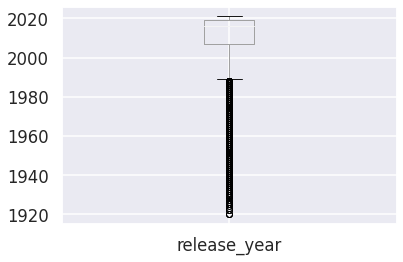

In [339]:
boxplot = df.boxplot(column=['release_year'])

In [340]:
ranges = [1920,1940,1960,1980,2000,2020]
df.groupby(pd.cut(df['release_year'], ranges)).count()

,is_movie,title,director,cast,release_year,rating,duration,season_count,genre 1,genre 2,genre 3,genre 4,genre 5
release_year,,,,,,,,,,,,,
"(1920, 1940]",172,172,170,169,172,172,172,172,172,88,31,6,2
"(1940, 1960]",324,324,314,308,324,324,324,324,324,191,72,23,11
"(1960, 1980]",346,346,325,334,346,346,346,346,346,177,61,13,7
"(1980, 2000]",932,932,847,909,932,932,932,932,932,564,198,34,28
"(2000, 2020]",6449,6449,4804,5480,6449,6449,6449,6449,6449,3959,1444,322,262


In [341]:
import plotly.figure_factory as ff
x1 = movies['duration'].fillna(0.0).astype(float)
fig = ff.create_distplot([x1], ['a'], bin_size=0.7, curve_type='normal', colors=["#6ad49b"])
fig.update_layout(title_text='Distplot with Normal Distribution')
fig.show()

# Isolation Forest
Isolation forest is an anomaly detection algorithm. It detects anomalies using isolation (how far a data point is to the rest of the data), rather than modelling the normal points.
Anomaly detection with Isolation Forest is a process composed of two main stages

in the first stage, a training dataset is used to build iTrees as described in previous sections.
in the second stage, each instance in the test set is passed through the iTrees build in the previous stage, and a proper “anomaly score” is assigned to the instance using the algorithm described below
Once all the instances in the test set have been assigned an anomaly score, it is possible to mark as “anomaly” any point whose score is greater than a predefined threshold, which depends on the domain the analysis is being applied to.

Text(0.5, 1.0, 'release_year')

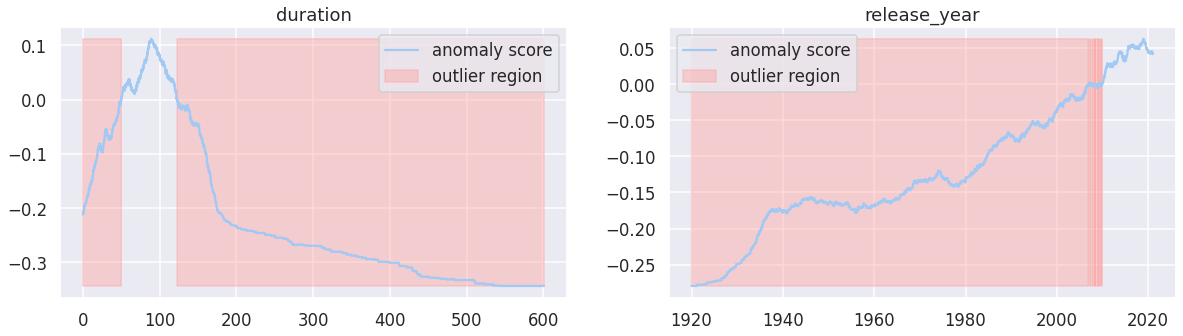

In [342]:
cols = ['Movie duration']
#Plotting the sub plot
column = 'duration'
fig, axs = plt.subplots(1, 2, figsize=(20, 5), facecolor='w', edgecolor='k')
axs = axs.ravel()

isolation_forest = IsolationForest(contamination='auto')
isolation_forest.fit(movies[column].values.reshape(-1,1))
x1 = movies['duration'].fillna(0.0).astype(float)
xx = np.linspace(x1.min(), x1.max(), len(movies)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)

axs[0].plot(xx, anomaly_score, label='anomaly score')
axs[0].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                  where=outlier==-1, color='r', 
                  alpha=.4, label='outlier region')
axs[0].legend()
axs[0].set_title(column)

isolation_forest = IsolationForest(contamination='auto')
isolation_forest.fit(df['release_year'].values.reshape(-1,1))

xx = np.linspace(df['release_year'].min(), df['release_year'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)

axs[1].plot(xx, anomaly_score, label='anomaly score')
axs[1].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                  where=outlier==-1, color='r', 
                  alpha=.4, label='outlier region')
axs[1].legend()
axs[1].set_title('release_year')

In [343]:
movies["duration"] = movies["duration"].astype(int) 
X = movies[['duration','release_year']]
duration_category = pd.qcut(X['duration'], q=20, precision=0).astype("category")
X["duration"] = duration_category.cat.codes
# categories_mapped = dict(zip(duration_category.cat.codes,[i.right for i in duration_category.cat.categories]))
# X["duration"] = X["duration"].apply(lambda x: categories_mapped[x] if x in categories_mapped else 0)
X = X.values

In [344]:
dict(zip(duration_category.cat.codes,[i.right for i in duration_category.cat.categories]))
# X

{1: 102.0,
 2: 81.0,
 3: 145.0,
 4: 106.0,
 7: 119.0,
 8: 93.0,
 10: 95.0,
 11: 601.0,
 12: 111.0,
 14: 130.0,
 15: 49.0,
 16: 30.0,
 18: 87.0}

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

Density-based spatial clustering of applications with noise (DBSCAN) is a well-known data clustering algorithm that is commonly used in data mining and machine learning.
Based on a set of points (let’s think in a bidimensional space as exemplified in the figure), DBSCAN groups together points that are close to each other based on a distance measurement (usually Euclidean distance) and a minimum number of points. It also marks as outliers the points that are in low-density regions

The DBSCAN algorithm basically requires 2 parameters:
eps: specifies how close points should be to each other to be considered a part of a cluster. It means that if the distance between two points is lower or equal to this value (eps), these points are considered neighbors.
minPoints: the minimum number of points to form a dense region. For example, if we set the minPoints parameter as 5, then we need at least 5 points to form a dense region.

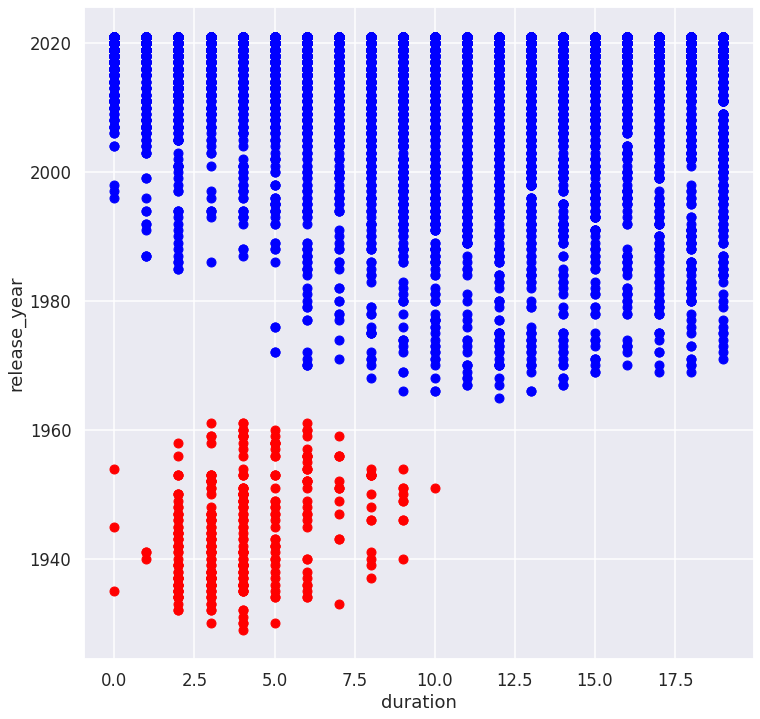

In [345]:

db = DBSCAN(eps=3.0, min_samples=30).fit(X)
labels = db.labels_

plt.figure(figsize=(12,12))

unique_labels = set(labels)
colors = ['blue', 'red']

for color, label in zip(colors, unique_labels):
    sample_mask = [True if l == label else False for l in labels]
    plt.plot(X[:,0][sample_mask], X[:, 1][sample_mask], 'o', color=color);
plt.xlabel('duration');
plt.ylabel('release_year');

# Local Outlier Factor (LOF)

The Local Outlier Factor (LOF) algorithm is an unsupervised anomaly detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outliers the samples that have a substantially lower density than their neighbors.

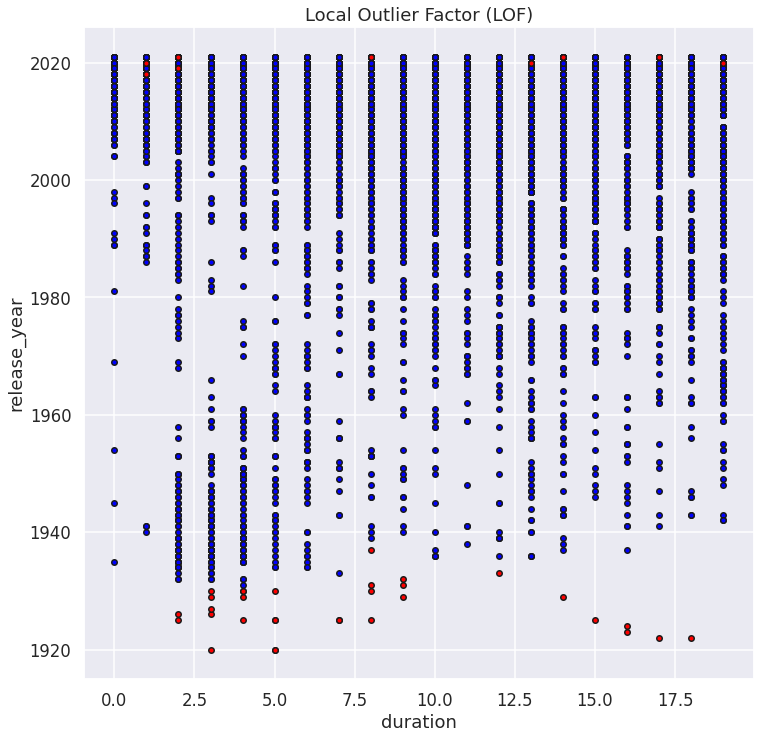

In [346]:
clf = LocalOutlierFactor(n_neighbors=50, contamination='auto')
# X = df[['release_year','duration']].values
y_pred = clf.fit_predict(X)

plt.figure(figsize=(12,12))
# plot the level sets of the decision function

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.title("Local Outlier Factor (LOF)")
# inliers
a = plt.scatter(X[in_mask, 0], X[in_mask, 1], c = 'blue',
                edgecolor = 'k', s = 30)
# outliers
b = plt.scatter(X[out_mask, 0], X[out_mask, 1], c = 'red',
                edgecolor = 'k', s = 30)
plt.axis('tight')
plt.xlabel('duration');
plt.ylabel('release_year');
plt.show()

# Z-Test

**Null Hypothesis**: Duration of the movies does no decrease with increase in release year

**Alternate Hypothesis**: Duration of movies increases with release year

**Population parameters**: Mean = pop_mean_high, standard deviation = pop_std_high

**Sample parameters**: Mean = sample_mean_low, standard deviation = sample_std_low

In [347]:
import statistics
import math

new_movies = movies[movies["release_year"] >= 2000]
old_movies = movies[movies["release_year"] < 2000]

pop_mean_high = new_movies['duration'].mean()
pop_std_high = statistics.stdev(new_movies['duration'])

old_movies_sample = old_movies.sample(frac=0.10)
sample_mean_low = old_movies_sample['duration'].mean()
sample_std_low = statistics.stdev(old_movies_sample['duration'])

print('Population mean ' + str(pop_mean_high))
print('Population std ' + str(pop_std_high))
print('Sample mean ' + str(sample_mean_low))
print('Sample std ' + str(sample_std_low))
print('Number of rows ' + str(len(other.index)))

Population mean 90.3425717048018
Population std 42.959035811637186
Sample mean 96.31446540880503
Sample std 28.583463920259174
Number of rows 8178


In [348]:
# Confidence Level 95%  for one sided Normal curve
zscore_critical = 1.65

# Calculate the test statistics 
zscore_test_stat = ((sample_mean_low - pop_mean_high) * math.sqrt(8178)) / sample_std_low
print(zscore_test_stat)
print('Null hypothesis is {}'.format(zscore_test_stat >= -zscore_critical and zscore_test_stat <= zscore_critical))

18.893863086368913
Null hypothesis is False


In [349]:
pop_mean_low = old_movies_sample['duration'].mean()
pop_std_low = statistics.stdev(old_movies_sample['duration'])

zscore_error = ((pop_mean_low - pop_mean_high)/pop_std_low)
print(zscore_error)

0.20892827127822397


Content Type on Amazon **Prime**

In [350]:
col = "is_movie"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["#6ad49b", "#a678de"]))
layout = go.Layout(title="", height=400, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

In [351]:
col = "genre 1"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["#6ad49b", "#a678de"]))
layout = go.Layout(title="", height=400, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

Original Release Year of the **movies**

In [352]:
col = "release_year"

vc1 = tvshows[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = movies[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))
trace2 = go.Bar(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#6ad49b"))
data = [trace1, trace2]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

Some of the oldest Tv Shows on Amazon Prime

In [353]:
small = tvshows.sort_values("release_year", ascending = True)
small[['title', "release_year"]][:15]

,title,release_year
9014,Last Frontier,1932
743,The Best of The Three Stooges in Color!,1936
1994,Jungle Queen: 2K Restored Special Edition,1945
3142,Basil Rathbone Sherlock Holmes in Color!,1946
1861,Life with Elizabeth,1954
1529,Napoleon Hill's Master Key,1954
9080,The Best of I Love Lucy,1954
129,What's My Line?,1955
7996,The Californians,1959
56,Yancy Derringer,1959


Some of the oldest movies on Amazon Prime

In [354]:
small = movies.sort_values("release_year", ascending = True)
small[['title', "release_year"]][:15]

,title,release_year
1474,Nomads Of The North,1920
1284,Pollyanna,1920
83,Within Our Gates,1920
1425,One Exciting Night,1922
1143,Robin Hood (Silent),1922
1684,Merry-Go-Round,1923
1134,Romola,1924
6627,Sir Arthur Conan Doyle's The Lost World,1925
1776,Madame Behave,1925
8590,Tumbleweeds,1925


TV Shows with many seasons

In [355]:
col = 'season_count'
vc1 = tvshows[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))
data = [trace1]
layout = go.Layout(title="Seasons", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

The ratings of the content ?

In [356]:
col = "rating"

vc1 = tvshows[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = movies[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))
trace2 = go.Bar(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#6ad49b"))
data = [trace1, trace2]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

What are the top Categories ?

In [357]:
categories = movies['genre 1']
counter_list =Counter(categories).most_common(25)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows", marker=dict(color="#a678de"))

data = [trace1]
layout = go.Layout(title="Content added over the years", height=600, legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [358]:
df.isna().sum()/df.shape[0]

is_movie        0.000000
title           0.000000
director        0.215707
cast            0.127746
release_year    0.000000
rating          0.000000
duration        0.000000
season_count    0.000000
genre 1         0.000000
genre 2         0.396084
genre 3         0.786987
genre 4         0.955139
genre 5         0.966535
dtype: float64

In [359]:
df.dropna(inplace = True) 
df.isna().sum()/df.shape[0]

is_movie        0.0
title           0.0
director        0.0
cast            0.0
release_year    0.0
rating          0.0
duration        0.0
season_count    0.0
genre 1         0.0
genre 2         0.0
genre 3         0.0
genre 4         0.0
genre 5         0.0
dtype: float64

Top directiors

In [360]:
directors = Counter(df.director)
topdirectors = directors.most_common(10)
td = px.bar(x = [i[0] for i in topdirectors],y = [i[1] for i in topdirectors],color=[i[1] for i in topdirectors])
td.update_layout(title = 'TOP DIRECTORS',xaxis_title = 'Directors',yaxis_title = 'No. of Shows/Movies')

Top Cast

In [361]:
cast = Counter(df.cast)
topcasts = cast.most_common(10)
tcast = px.bar(x = [i[0] for i in topcasts],y = [i[1] for i in topcasts],color=[i[1] for i in topcasts])
tcast.update_layout(title = 'TOP CASTS',xaxis_title = 'Name of Cast',yaxis_title = 'Count')

Top Movies Duration

In [362]:
md = Counter(movies.duration)
topmd = md.most_common(10)
mdt = px.bar(x = [i[0] for i in topmd],y = [i[1] for i in topmd],color=[i[1] for i in topmd],width = 1000)
mdt.update_layout(title = 'TOP MOVIES DURATION',xaxis_title = 'Duration',yaxis_title = 'Count')

**Interactive** data visualization

In [363]:
pip install pandas-bokeh


In [364]:
import pandas_bokeh
pandas_bokeh.output_notebook()

In [365]:
movies["release_year"].plot_bokeh(kind='hist', bins=10);

Data types **Visualization**

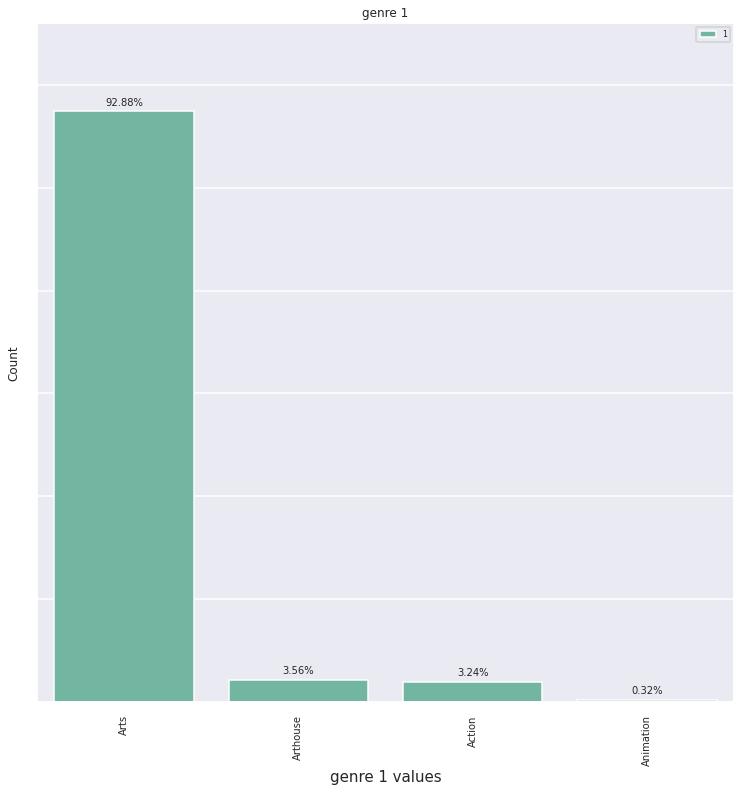

In [366]:
cols = ["genre 1"] 
import matplotlib.gridspec as gridspec 
grid = gridspec.GridSpec(3, 3, wspace=0.5, hspace=0.5) 
plt.figure(figsize=(50,50)) 
        
for n, col in enumerate(df[cols]): 
  ax = plt.subplot(grid[n])
sns.countplot(x=col, data=df, hue='is_movie', palette='Set2') 
ax.set_ylabel('Count', fontsize=12) 
ax.set_title(f'{col}',fontsize=12) 
ax.set_xlabel(f'{col} values', fontsize=15)
xlabels = ax.get_xticklabels() 
ylabels = ax.get_yticklabels() 
ax.set_xticklabels(xlabels, fontsize=10)
ax.set_yticklabels(ylabels, fontsize=10) 
plt.legend(fontsize=8)
plt.xticks(rotation=90)
total = len(df) 
sizes=[]
for p in ax.patches:
   height=p.get_height()
   sizes.append(height) 
   ax.text(p.get_x()+p.get_width()/2.,
          height + 3, 
          '{:1.2f}%'.format(height/total*100), 
          ha="center", fontsize=10) 
ax.set_ylim(0, max(sizes) * 1.15) 
plt.show()

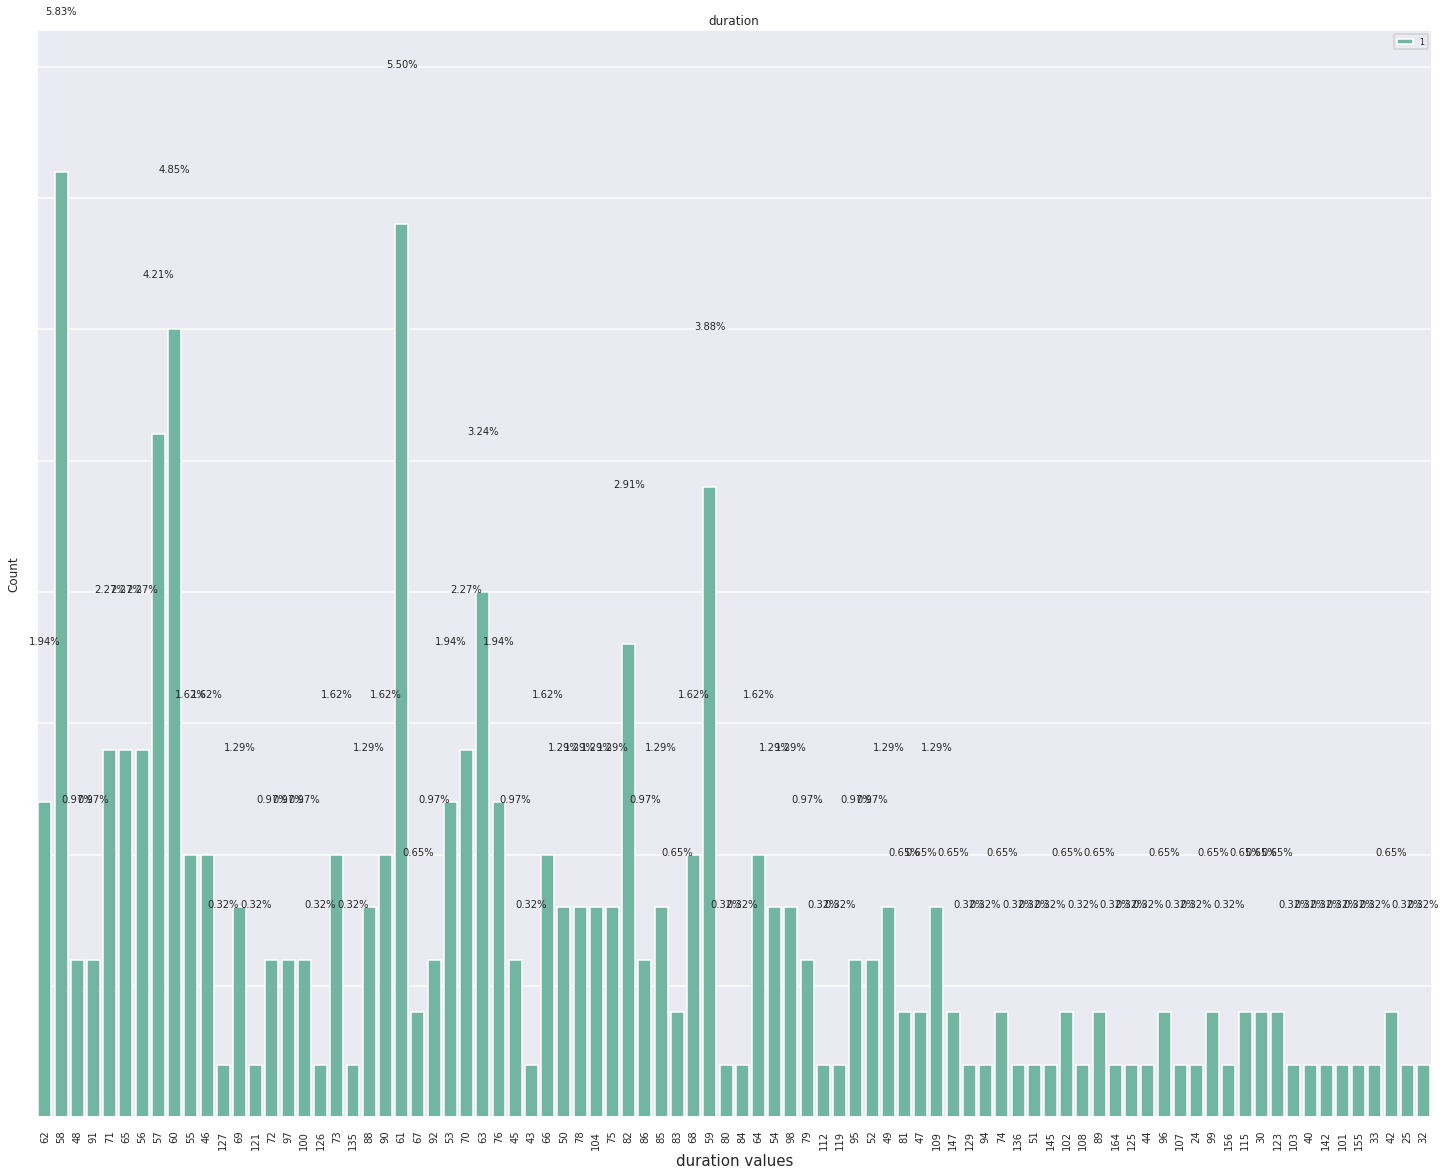

In [367]:
cols = ["duration"] 
import matplotlib.gridspec as gridspec 
grid = gridspec.GridSpec(3, 3, wspace=0.5, hspace=0.5) 
plt.figure(figsize=(100,80)) 
        
for n, col in enumerate(df[cols].astype(int)): 
  ax = plt.subplot(grid[n])
sns.countplot(x=col, data=df, hue='is_movie', palette='Set2') 
ax.set_ylabel('Count', fontsize=12) 
ax.set_title(f'{col}',fontsize=12) 
ax.set_xlabel(f'{col} values', fontsize=15)
xlabels = ax.get_xticklabels() 
ylabels = ax.get_yticklabels() 
ax.set_xticklabels(xlabels, fontsize=10)
ax.set_yticklabels(ylabels, fontsize=10) 
plt.legend(fontsize=8)
plt.xticks(rotation=90)
total = len(df) 
sizes=[]
for p in ax.patches:
   height=p.get_height()
   sizes.append(height) 
   ax.text(p.get_x()+p.get_width()/2.,
          height + 3, 
          '{:1.2f}%'.format(height/total*100), 
          ha="center", fontsize=10) 
ax.set_ylim(0, max(sizes) * 1.15) 
plt.show()

 Multidimensional data visualization

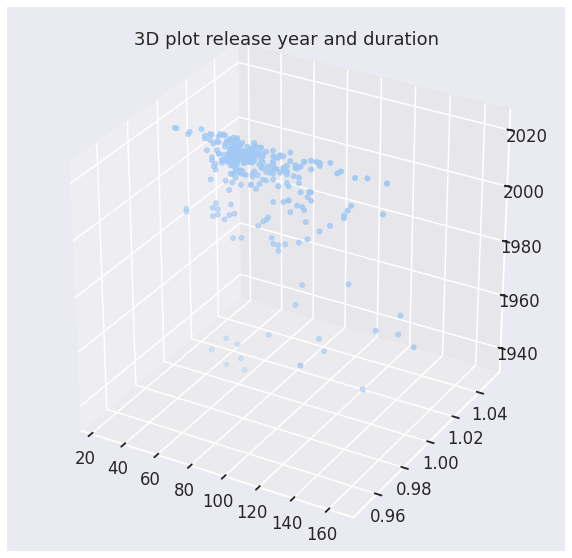

In [368]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
fig = plt.figure(figsize=(10,10))
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining all 3 axes
z = df.release_year
x = (df.duration).astype(int)
y = (df.is_movie).astype(int)
 
# plotting
ax.scatter(x, y, z, 'green')
ax.set_title('3D plot release year and duration')
plt.show()

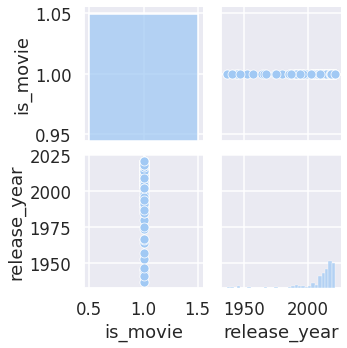

In [369]:
sns.pairplot(data=df)